# US Housing Market Analysis

In [3421]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from kaleido.scopes.plotly import PlotlyScope
from bokeh.io import export_png
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Loading and cleaning data
We will be using data from [US Housing Market Analysis: Supply-Demand Dynamics](https://www.kaggle.com/datasets/utkarshx27/factors-influence-house-price-in-us) on Kaggle. There are 2 csv files in this dataset: `supply.csv' and `demand.csv`. 

In [3422]:
# Read in data
file_path = Path("data/housing_data4.csv")
df = pd.read_csv(file_path)
df.head()

,Date,Price Index,Sentiment Index,Construction,Mortgage Rate,NASDAQ,Housing Starts,NFCI
0,1987-01-01,63.734,90.4,1090.0,125.90971,384.227143,1774.0,-0.506
1,1987-02-01,64.134,90.2,1096.0,124.24761,411.712632,1784.0,-0.495
2,1987-03-01,64.469,90.8,1084.0,123.59781,432.204545,1726.0,-0.335
3,1987-04-01,64.973,92.8,1079.0,134.50752,422.771429,1614.0,0.105
4,1987-05-01,65.547,91.1,1070.0,144.95212,416.634000,1628.0,0.540


In [3423]:
df.tail()

,Date,Price Index,Sentiment Index,Construction,Mortgage Rate,NASDAQ,Housing Starts,NFCI
428,2022-09-01,300.451,58.6,1698.0,83.61149,11402.850000,1463.0,-0.1320
429,2022-10-01,298.672,59.9,1710.0,94.39124,10801.494286,1432.0,-0.0925
430,2022-11-01,296.809,56.8,1695.0,93.09166,10973.638095,1427.0,-0.1725
431,2022-12-01,294.266,59.7,1696.0,87.05882,10838.995714,1357.0,-0.1960
432,2023-01-01,292.444,64.9,1695.0,85.80711,11013.991000,1340.0,-0.2825


In [3424]:
# create a new column called 'PRICE_CHANGE_UP_DOWN' and set the values to 0 if the value of the 'CSUSHPISA' column is less than the value of the previous row, otherwise set the value to 1
df["Price Change"] = np.where(df["Price Index"] < df["Price Index"].shift(1), 0, 1)
df.tail(10)

,Date,Price Index,Sentiment Index,Construction,Mortgage Rate,NASDAQ,Housing Starts,NFCI,Price Change
423,2022-04-01,301.789,65.2,1669.0,68.16005,13394.163000,1803.0,-0.3320,1
424,2022-05-01,306.569,58.4,1680.0,71.54583,11829.729524,1543.0,-0.2525,1
425,2022-06-01,308.334,50.0,1688.0,75.54036,11418.919048,1561.0,-0.1725,1
426,2022-07-01,307.135,51.5,1683.0,74.04241,11622.631500,1371.0,-0.1660,0
427,2022-08-01,303.649,58.2,1702.0,71.44323,12570.260435,1505.0,-0.2275,0
428,2022-09-01,300.451,58.6,1698.0,83.61149,11402.850000,1463.0,-0.1320,0
429,2022-10-01,298.672,59.9,1710.0,94.39124,10801.494286,1432.0,-0.0925,0
430,2022-11-01,296.809,56.8,1695.0,93.09166,10973.638095,1427.0,-0.1725,0
431,2022-12-01,294.266,59.7,1696.0,87.05882,10838.995714,1357.0,-0.1960,0
432,2023-01-01,292.444,64.9,1695.0,85.80711,11013.991000,1340.0,-0.2825,0


In [3425]:
# get the value counts for the PRICE_CHANGE_UP_DOWN column
df["Price Change"].value_counts()

1    317
0    116
Name: Price Change, dtype: int64

# Defining the feature and target variables

In [3426]:
# Define features set
X = df.copy()
X = X.drop("Date", axis=1)
X = X.drop("Price Index", axis=1)
X = X.drop("Price Change", axis=1)
# drop first row
X = X.iloc[1:]
X.head()

,Sentiment Index,Construction,Mortgage Rate,NASDAQ,Housing Starts,NFCI
1,90.2,1096.0,124.24761,411.712632,1784.0,-0.495
2,90.8,1084.0,123.59781,432.204545,1726.0,-0.335
3,92.8,1079.0,134.50752,422.771429,1614.0,0.105
4,91.1,1070.0,144.95212,416.634000,1628.0,0.540
5,91.5,1060.0,144.15185,423.695909,1594.0,0.500


In [3427]:
# checking the shape of X and if there are any null values
print(X.shape)
print(X.isnull().sum())

(432, 6)
Sentiment Index    0
Construction       0
Mortgage Rate      0
NASDAQ             0
Housing Starts     0
NFCI               0
dtype: int64


# Creating the target vector CSUSHPISA = S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)

In [3428]:
# Define target vector 'PRICE_CHANGE_UP_DOWN' as y
y = df["Price Change"].values.reshape(-1, 1)
y = y[1:]
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

# Splitting the data into training and testing sets

In [3429]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [3430]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [3431]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [3432]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled.shape

(108, 6)

# Fitting the Random Forest model

Having scaled the data, we can now fit the Random Forest model to the training data.

In [3433]:
# create the random forrest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# fit the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

# Making predictions with the Random Forest model

In [3434]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [3435]:
# compare predictions to actual values
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


First 10 Predictions:   [1 1 1 0 0 1 1 0 1 1]
First 10 Actual labels: [[1], [1], [1], [0], [1], [1], [1], [0], [1], [1]]


# Evaluating the Random Forest model

In [3436]:
# chart of predictions vs actual
results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()})
# change the datatypes to float
results_df = results_df.astype("float64")
# add a column for the difference between the prediction and actual
results_df["Difference"] = results_df["Actual"] - results_df["Prediction"]
# add a column for the percent difference between the prediction and actual
results_df["Percent Difference"] = results_df["Difference"] / results_df["Actual"] * 100
# find the highest percent difference
results_df["Percent Difference"].max()
results_df.head(10)

,Prediction,Actual,Difference,Percent Difference
0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,NaN
4,0.0,1.0,1.0,100.0
5,1.0,1.0,0.0,0.0
6,1.0,1.0,0.0,0.0
7,0.0,0.0,0.0,NaN
8,1.0,1.0,0.0,0.0
9,1.0,1.0,0.0,0.0


In [3437]:
# calculate the mean absolute error (MAE)
mae = results_df["Difference"].mean()
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: -0.018518518518518517


In [3438]:
# calculate the mean squared error (MSE)
mse = results_df["Difference"].apply(lambda x: x**2).mean()
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.09259259259259259


In [3439]:
# calculate the root mean squared error (RMSE)
rmse = mse**(0.5)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 0.3042903097250923


In [3440]:
# calculate the mean absolute percent error (MAPE)
mape = results_df["Percent Difference"].abs().mean()
print(f"Mean Absolute Percent Error: {mape}")


Mean Absolute Percent Error: inf


In [3441]:
# Evaluating the Random Forest model
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")


Accuracy Score : 0.9074074074074074


# Feature importance

In [3442]:
# get the feature importance array
importances = rf_model.feature_importances_
# list of features
feature_list = list(X.columns)
# sort the features by their importance
sorted(zip(rf_model.feature_importances_, feature_list), reverse=True)
# print the feature importance
for feature in zip(feature_list, rf_model.feature_importances_):
    print(f"{feature[0]}: ({feature[1]})")
    

Sentiment Index: (0.2134200437532432)
Construction: (0.19495417346363272)
Mortgage Rate: (0.13673117574638793)
NASDAQ: (0.13258875866544578)
Housing Starts: (0.20479121793612753)
NFCI: (0.11751463043516273)


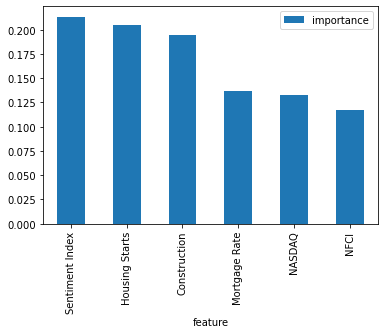

In [3443]:
# add the feature importance to a dataframe
feature_importance_df = pd.DataFrame({"feature": feature_list, "importance": importances})
# sort the dataframe by the importance
feature_importance_df = feature_importance_df.sort_values("importance", ascending=False)
# set the index to be the feature
feature_importance_df = feature_importance_df.set_index("feature", drop=True)
# plot the feature importance
feature_importance_df.plot(kind="bar")
plt.show()

In [3444]:
# use plotly to create a bar chart of the feature importance
fig = px.bar(feature_importance_df, x=feature_importance_df.index, y="importance", title="Feature Importance")
# save the graph
fig.write_image("images/feature_importance_streamlined.png")
fig.show()

In [3445]:
# create a confusion matrix
cm = confusion_matrix(y_test, predictions)
# create a dataframe from the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# display the confusion matrix
display(cm_df)


,Predicted 0,Predicted 1
Actual 0,23,6
Actual 1,4,75


In [3446]:
# print the classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.93      0.95      0.94        79

    accuracy                           0.91       108
   macro avg       0.89      0.87      0.88       108
weighted avg       0.91      0.91      0.91       108



In [3447]:
# define a function to output images of tables
def save_df_as_image(df, filename):
    source = ColumnDataSource(df)
    columns = [TableColumn(field=Ci, title=Ci) for Ci in df.columns]  # bokeh columns
    # add index column
    columns.insert(0, TableColumn(field="index", title="index"))
    # use df index as index column
    source.add(df.index, "index")
    data_table = DataTable(columns=columns, source=source, width=800, height=280)
    export_png(data_table, filename=filename)

In [3448]:
# save a table of the feature importance
save_df_as_image(feature_importance_df, "images/feature_importance_streamlined_table.png")

In [3449]:
# save a table of the confusion matrix
save_df_as_image(cm_df, "images/confusion_matrix_streamlined_table.png")

In [3450]:
# save a table of the classification report
classification_report_df = pd.DataFrame(classification_report(y_test, predictions, output_dict=True)).transpose()
save_df_as_image(classification_report_df, "images/classification_report_streamlined_table.png")